# Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the
company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are
differences across the product with respect to customer characteristics.
Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along
with their insights/impact on the business.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

# Data Analysis / Data Exploration

In [3]:
data.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [4]:
data.tail(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200
172,KP781,34,Male,16,Single,5,5,92131,150
173,KP781,35,Male,16,Partnered,4,5,92131,360
174,KP781,38,Male,18,Partnered,5,5,104581,150
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [5]:
data.shape

(180, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
data_un = pd.Series({c: data[c].unique() for c in data})
data_un

Product                                      [KP281, KP481, KP781]
Age              [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2...
Gender                                              [Male, Female]
Education                         [14, 15, 12, 13, 16, 18, 20, 21]
MaritalStatus                                  [Single, Partnered]
Usage                                           [3, 2, 4, 5, 6, 7]
Fitness                                            [4, 3, 2, 1, 5]
Income           [29562, 31836, 30699, 32973, 35247, 37521, 363...
Miles            [112, 75, 66, 85, 47, 141, 103, 94, 113, 38, 1...
dtype: object

**_Observations_**:

    * The data consists of 180 rows and 9 columns.    
    * Product, Gender and Marital Status are the only object datatype.    
    * Age, Education, Usage, Fitness, Income and Miles are of int datatype    


In [136]:
data = data.astype({'Product':'category','Gender':'category','MaritalStatus':'category'})

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [8]:
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [9]:
data_n = pd.Series({c: data[c].nunique() for c in data})
data_n

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [10]:
data['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [11]:
data['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [12]:
data['Miles'].value_counts()

85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
100     7
53      7
64      6
56      6
200     6
180     6
127     5
160     5
150     4
42      4
120     3
103     3
170     3
74      3
38      3
132     2
141     2
169     1
188     1
212     1
260     1
140     1
112     1
360     1
21      1
80      1
300     1
280     1
240     1
Name: Miles, dtype: int64

In [13]:
data['Age'].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
47     2
45     2
44     1
46     1
18     1
43     1
42     1
41     1
39     1
36     1
50     1
Name: Age, dtype: int64

In [48]:
data['Miles']/180

0      0.622222
1      0.416667
2      0.366667
3      0.472222
4      0.261111
         ...   
175    1.111111
176    1.111111
177    0.888889
178    0.666667
179    1.000000
Name: Miles, Length: 180, dtype: float64

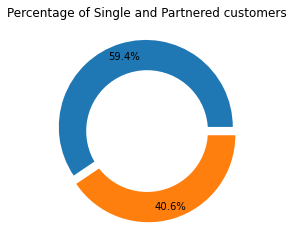

In [138]:
# figure 1
p = data['MaritalStatus'].value_counts()
explode = (0.05, 0.05)

  
plt.pie(p, autopct='%1.1f%%', pctdistance=0.85, explode=explode)
  
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Single and Partnered customers')
plt.show()

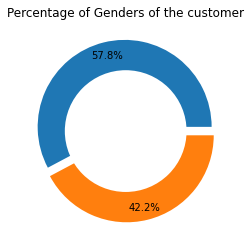

In [139]:
# figure 2
p = data['Gender'].value_counts()
explode = (0.05, 0.05)

  
plt.pie(p, autopct='%1.1f%%', pctdistance=0.85, explode=explode)
  
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
plt.title('Percentage of Genders of the customer')
plt.show()

# Graphical Analysis

## Detecting Outliers

In [16]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**_Observations_**:-

    * The mean age of all the customers of Aerofit is 28 years.
    * The maximum and minimum age range for customer's education is 21 and 12 years making a mean of 15.5 years.    
    * The average use of the Aerofit product used by the customers is 3 days per week.    
    * The median for fitness scale for the customers is 3 which is also the median meanwhile 1 is the lowest scale and 5 is the highest.       
    * Average income of all the customers is around 53k(in dollars).    
    * Average miles ran by all the customers is 103 miles and median of 94 miles although the maximum record is for 360 miles.

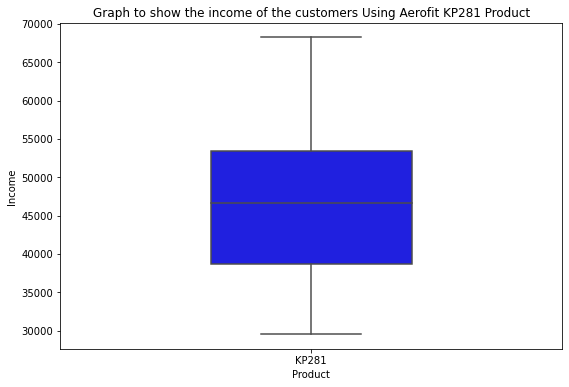

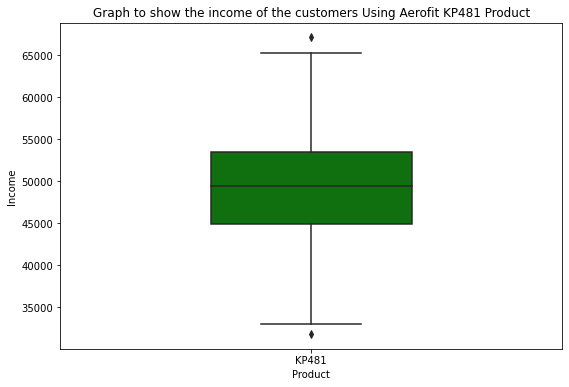

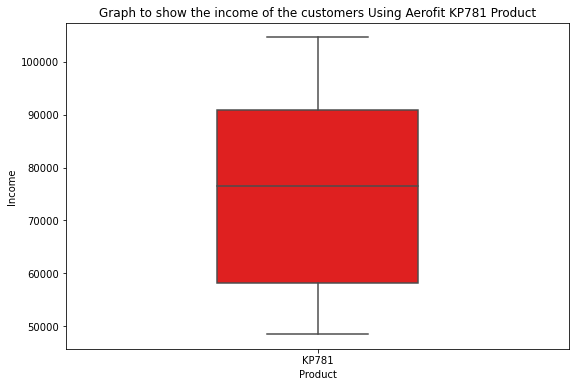

In [109]:
# figure 3
kp28 = data[data['Product']== 'KP281']

kp48 = data[data['Product'] == 'KP481']

kp78 = data[data['Product'] == 'KP781']

plt.figure(figsize=(9,6))
sns.boxplot(data=kp28,x='Product',y='Income',width=0.40,color='b')
plt.title('Graph to show the income of the customers Using Aerofit KP281 Product')
plt.show()

plt.figure(figsize=(9,6))
sns.boxplot(data=kp48,x='Product',y='Income',width=0.40,color='g')
plt.title('Graph to show the income of the customers Using Aerofit KP481 Product')
plt.show()

plt.figure(figsize=(9,6))
sns.boxplot(data=kp78,x='Product',y='Income',width=0.40,color='r')
plt.title('Graph to show the income of the customers Using Aerofit KP781 Product')
plt.show()

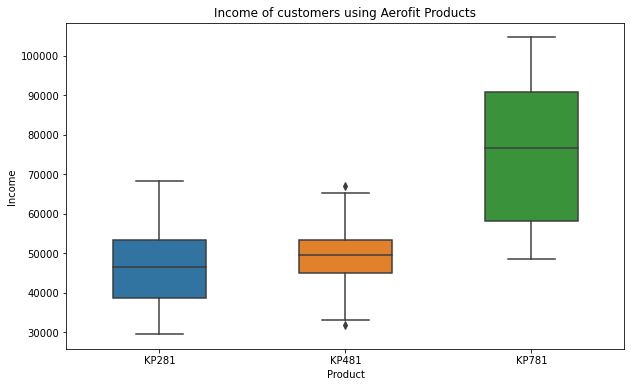

In [18]:
# figure 4
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='Product',y='Income',width=0.50)
plt.title('Income of customers using Aerofit Products')
plt.show()

**_Observations_**:-

    * Low Average income holders are from the customers using KP281 and KP481.
    * High income people belong to the customers using KP781.
    * Outliers of income can be seen in KP481 and possible outliers can be around 30k(in dollars) and 67k(in dollars).

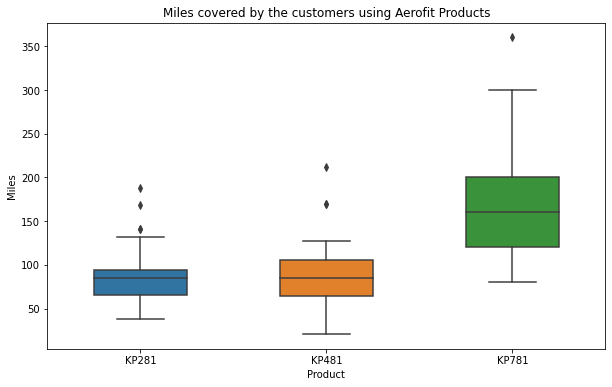

In [19]:
# boxplot showeing the miles covered by customers using each product
# figure 5
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='Product',y='Miles',width=0.50)
plt.title('Miles covered by the customers using Aerofit Products')
plt.show()

**_Observation_**:-
    
    * The average miles covered by customers using KP281 and KP481 are lower than KP791.
    * Possible miles outliers for customer using KP481 are between 130 to 220 miles.
    * Possible miles outliers for customer using KP281 lie between 140 to 190 miles.
    * Possinle miles outliers for customer using KP781 are above 350 miles.

## Areas affecting Products

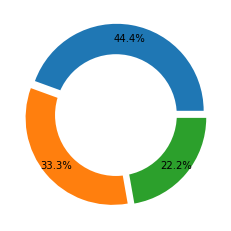

In [20]:
# what percentage of products used by all the customers in the dataset
# figure 6
p = data['Product'].value_counts()
explode = (0.05, 0.05, 0.05)

  
plt.pie(p, autopct='%1.1f%%', pctdistance=0.85, explode=explode)
  
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
fig.gca().add_artist(centre_circle)
plt.show()

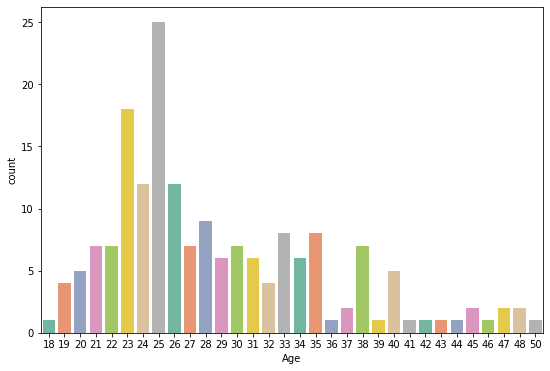

In [21]:
# figure 7
plt.figure(figsize=(9,6))
sns.countplot(x=data['Age'],palette="Set2")
plt.show()

**_Observations_**:-
    
    * Age group of 23-26 are pretty active in the field of using Aerofit Products.
    * Age group between 41-50 are the people who are less active on the side of buying Aerofit Products.

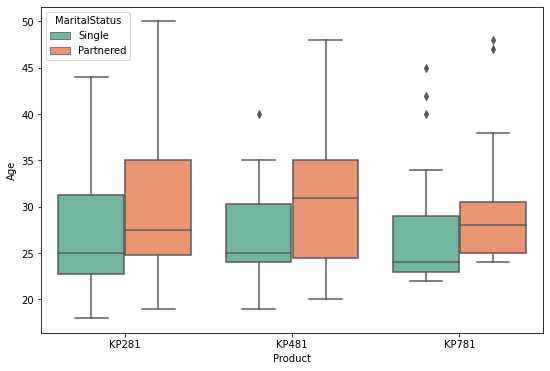

In [22]:
# figure 8
plt.figure(figsize=(9,6))
sns.boxplot(data=data,x='Product',y='Age',hue='MaritalStatus',palette="Set2")
plt.show()

**_Observations_**:-

    * Median of all the single people buying all the Products have a less range.
    * Married people as well as sigle customers are lesser for using KP781.
    * Married couples using KP281 and KP481 are the same.

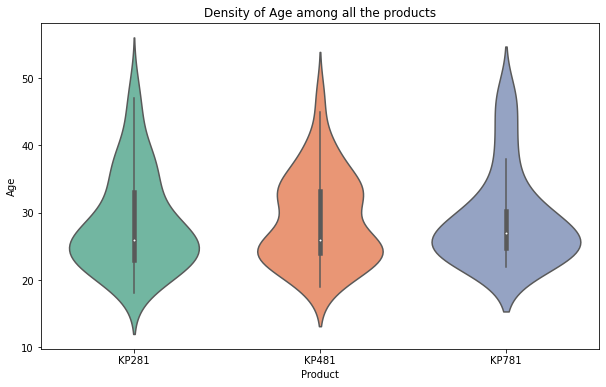

In [140]:
# figure 9
plt.figure(figsize=(10,6))
sns.violinplot(data=data,x='Product',y ='Age',palette="Set2")
plt.title('Density of Age among all the products')
plt.show()

**_Observations_**:-

    * The probability density of the age group of people between 20-35 years that are using Aerofit Products are greater.
    * Median age of all the customers purchasing any products between the three are the same.

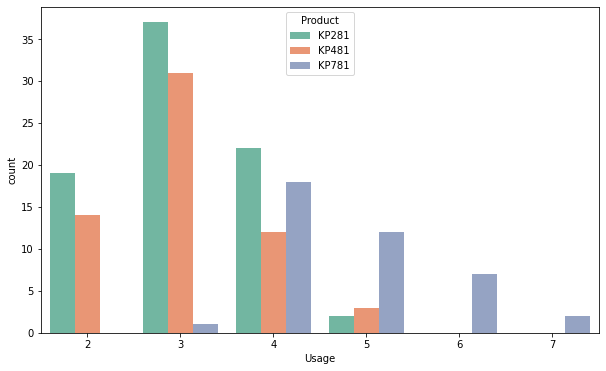

In [24]:
# figure 10
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='Usage',hue='Product',palette="Set2")
plt.show()

**_Observations_**:-

    * Customers using the products KP281 and KP481 are using the product on an average of 3 days per week.
    * Majority of customers are not very interested in using the products for all 7 days of the week.

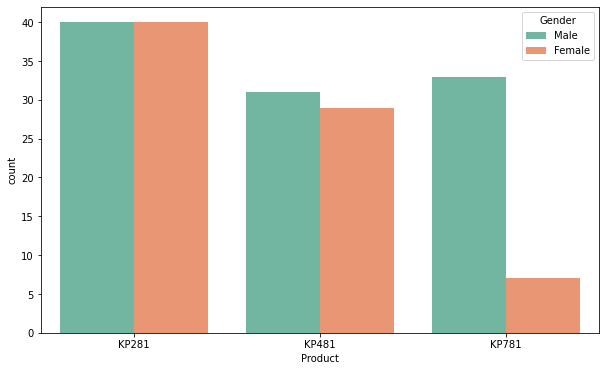

In [92]:
# figure 11
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='Product',hue='Gender',palette="Set2")
plt.show()

**_Observations_**:-
    
    * There can be seen an equal count of both males and females that are using the product KP281.
    * Female customers using KP781 are the lowest.

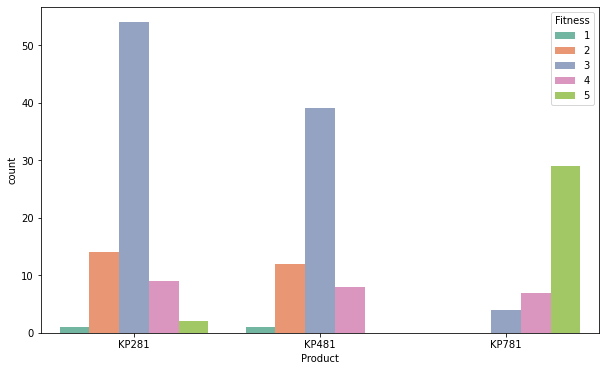

In [44]:
# figure 12
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='Product',hue='Fitness',palette="Set2")
plt.show()

**_Observation_**:-
    
    * Majority of customers are using KP281 and KP481 for about 3 days per week.
    * Majority of customers using KP781 are using the product for about 5 days per week.

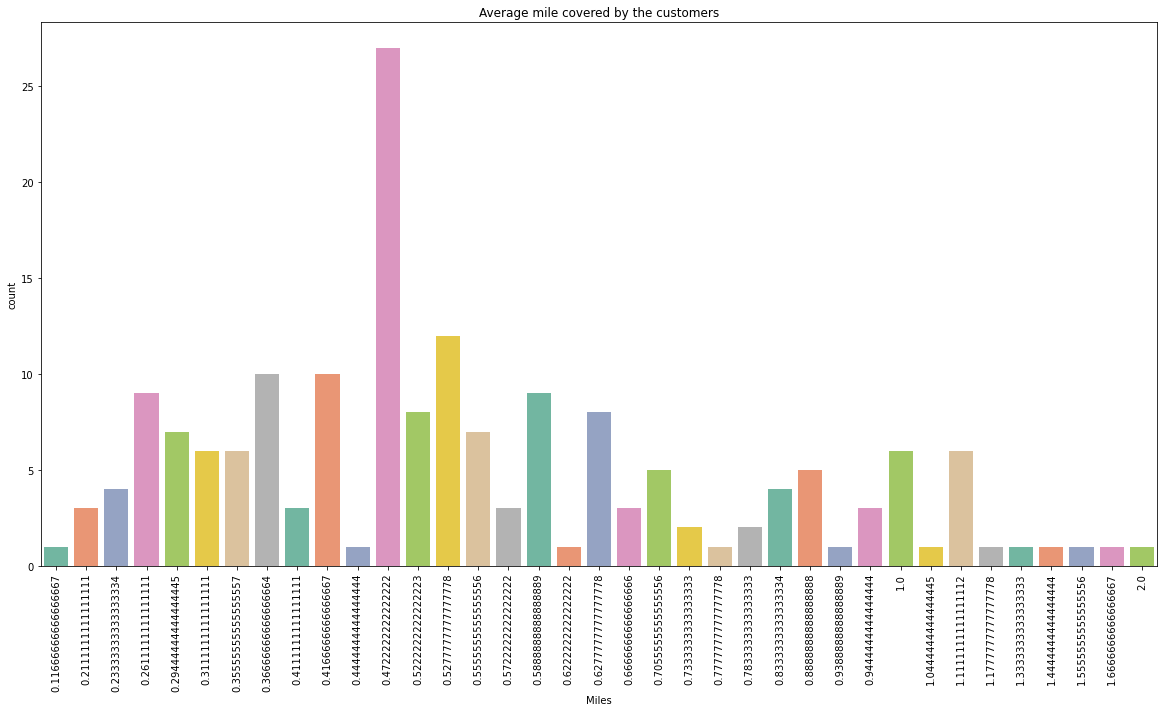

In [54]:
# figure 13
plt.figure(figsize=(20,10))
l = data['Miles']/180
plt.xticks(rotation =90)
plt.title('Average mile covered by the customers')
sns.countplot(x=l,palette="Set2")
plt.show()

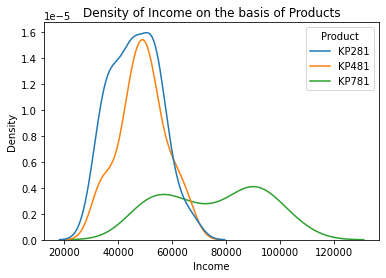

In [123]:
# figure 14
sns.kdeplot(data=data, x='Income',hue="Product")
plt.title('Density of Income on the basis of Products')
plt.show()

**_Observation_**:-
    
    * Income of the customers purchasing KP281 and KP481 have almost the same density still the average income of customers using KP481 is greater.
    * The income of the customers using KP781 have covered the density from customers having minimum income to customers having maximum income.

## Marginal Probability and Conditional Probability

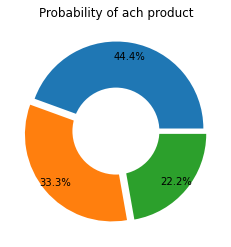

In [141]:
# figure 15
data_pro = data['Product'].value_counts()/180
explode = (0.03, 0.06, 0.05)
  
plt.pie(x=data_pro, autopct='%1.1f%%', pctdistance=0.85,explode=explode)
  
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
plt.title('Probability of ach product')
fig.gca().add_artist(centre_circle)
plt.show()

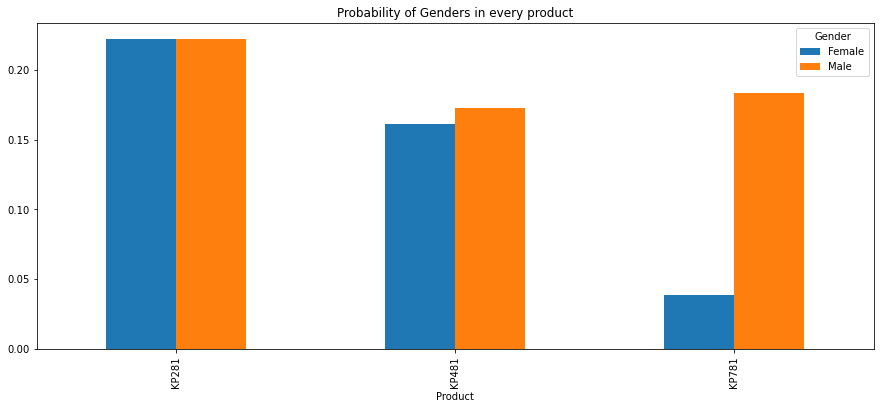

In [125]:
# figure 16
data_gen_pro = pd.crosstab(data['Product'],data['Gender'],normalize=True)
data_gen_pro.plot.bar(figsize=(15,6),grid=False)
plt.title('Probability of Genders in every product')
plt.show()

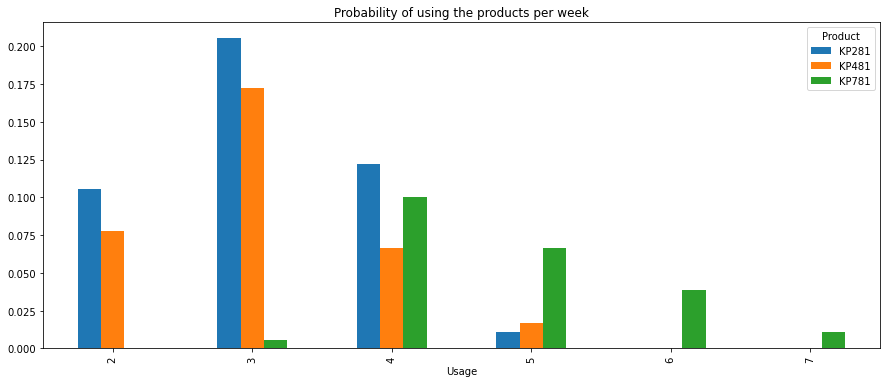

In [129]:
# figure 17
data_use_pro = pd.crosstab(data['Usage'],data['Product'],normalize=True)
data_use_pro.plot.bar(figsize=(15,6),grid=False)
plt.title('Probability of using the products per week')
plt.show()

**_Observation_**:-

    * Customers using KP281 are considering to use the products for 2 to 4 days per week.
    * Customers using KP781 are considering to use the products for 4 to 7 days per week.

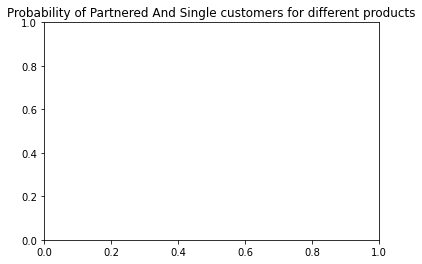

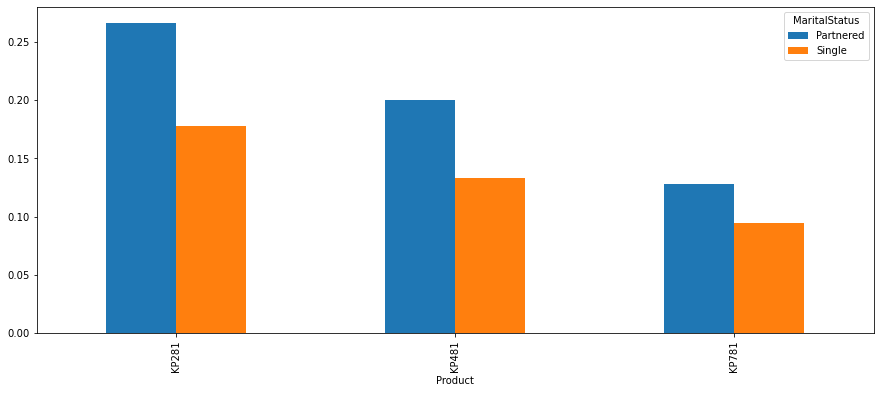

In [142]:
# figure 18
data_marstat = pd.crosstab(data['Product'],data['MaritalStatus'],normalize=True)
plt.title('Probability of Partnered And Single customers for different products')
data_marstat.plot.bar(figsize=(15,6),grid=False)
plt.show()

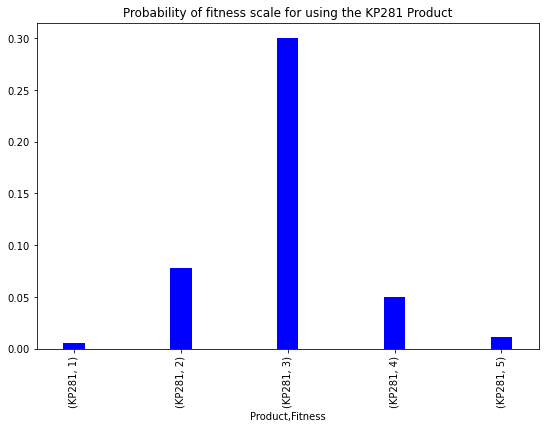

In [130]:
# figure 19
prob1 = data[data['Product']=='KP281'].groupby(['Product','Fitness']).size()/len(data['Product'] == 'KP281')
prob1.plot.bar(figsize=(9,6),grid=False,color='b',width=0.2)
plt.title('Probability of fitness scale for using the KP281 Product')
plt.show()

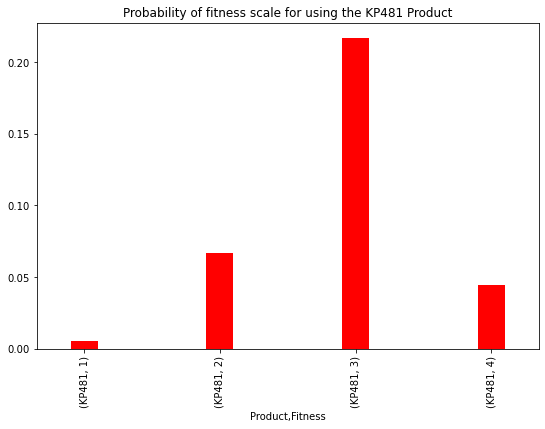

In [131]:
# figure 20
prob2 = data[data['Product']=='KP481'].groupby(['Product','Fitness']).size()/len(data['Product'] == 'KP481')
prob2.plot.bar(figsize=(9,6),grid=False,color='r',width=0.2)
plt.title('Probability of fitness scale for using the KP481 Product')
plt.show()

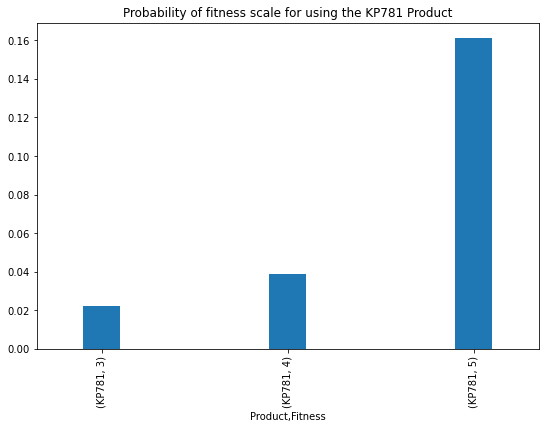

In [132]:
# figure 21
prob3 = data[data['Product']=='KP781'].groupby(['Product','Fitness']).size()/len(data['Product'] == 'KP781')
prob3.plot.bar(figsize=(9,6),grid=False,width=0.2)
plt.title('Probability of fitness scale for using the KP781 Product')
plt.show()

# Correlations between variables

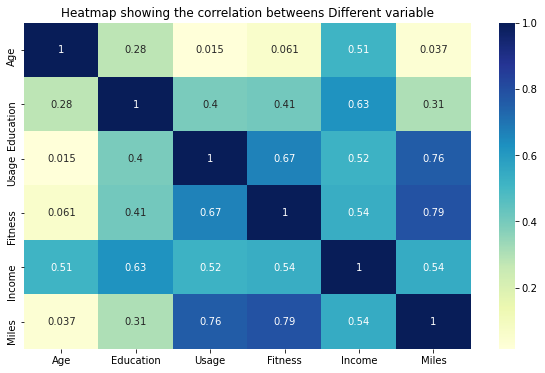

In [133]:
# figure 22
corr = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(data=corr,cmap="YlGnBu",annot=True)
plt.title('Heatmap showing the correlation betweens Different variable')
plt.show()

**_Observation_**:

    * Miles makes Fitness denser.
    * Income makes Education denser.
    * Education got higher with Income.
    * Age makes Fitness lower.    

<Figure size 1440x864 with 0 Axes>

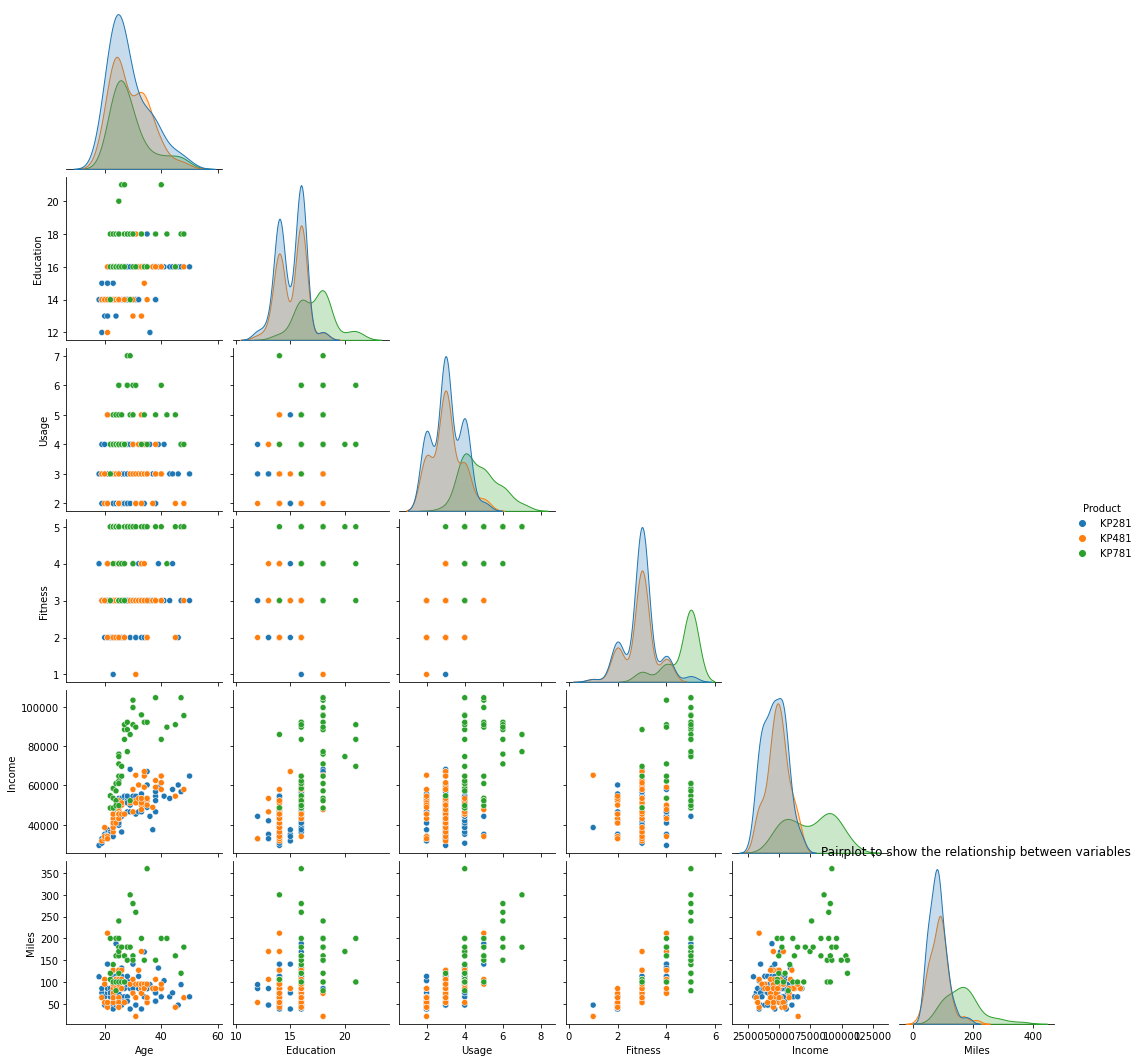

In [135]:
# figure 23
plt.figure(figsize=(20,12))
sns.pairplot(data,corner=True,hue='Product')
plt.title('Pairplot to show the relationship between variables')
plt.show()

**_Observations_**:-
    
    * Age increses, Income increases.
    * Fitness increases as Miles increases.
    * Usage increases as Miles Increases.
    * Income increases as Miles Increases.

# Non- Graphical Analysis

In [66]:
data_fit = data.groupby(['Fitness','Product']).size().reset_index().rename(columns={0:'Total'})
data_fit

,Fitness,Product,Total
0,1,KP281,1
1,1,KP481,1
2,2,KP281,14
3,2,KP481,12
4,3,KP281,54
5,3,KP481,39
6,3,KP781,4
7,4,KP281,9
8,4,KP481,8
9,4,KP781,7


In [69]:
data_use = data.groupby(['Usage','Product']).size().reset_index().rename(columns={0:'Total'})
data_use

,Usage,Product,Total
0,2,KP281,19
1,2,KP481,14
2,3,KP281,37
3,3,KP481,31
4,3,KP781,1
5,4,KP281,22
6,4,KP481,12
7,4,KP781,18
8,5,KP281,2
9,5,KP481,3


In [88]:
data_mar_fit = data.groupby(['Fitness','Product','MaritalStatus']).size().reset_index().rename(columns={0:'Total'})
data_mar_fit

,Fitness,Product,MaritalStatus,Total
0,1,KP281,Partnered,1
1,1,KP481,Single,1
2,2,KP281,Partnered,11
3,2,KP281,Single,3
4,2,KP481,Partnered,7
5,2,KP481,Single,5
6,3,KP281,Partnered,31
7,3,KP281,Single,23
8,3,KP481,Partnered,25
9,3,KP481,Single,14


In [87]:
x = data.groupby(['Income'])['Product'].size().reset_index().sort_values(by=['Product'],ascending=False)
x

,Income,Product
14,45480,14
25,52302,9
15,46617,8
26,53439,8
28,54576,8
...,...,...
27,53536,1
29,54781,1
34,58516,1
30,55713,1


In [89]:
data_mar_gen = data.groupby(['Gender','Product','MaritalStatus']).size().reset_index().rename(columns={0:'Total'})
data_mar_gen

,Gender,Product,MaritalStatus,Total
0,Female,KP281,Partnered,27
1,Female,KP281,Single,13
2,Female,KP481,Partnered,15
3,Female,KP481,Single,14
4,Female,KP781,Partnered,4
5,Female,KP781,Single,3
6,Male,KP281,Partnered,21
7,Male,KP281,Single,19
8,Male,KP481,Partnered,21
9,Male,KP481,Single,10


In [91]:
data_gen_inc = data.groupby(['Gender','Product']).size().reset_index().rename(columns={0:'Total'})
data_gen_inc

,Gender,Product,Total
0,Female,KP281,40
1,Female,KP481,29
2,Female,KP781,7
3,Male,KP281,40
4,Male,KP481,31
5,Male,KP781,33


In [120]:
data_all = pd.pivot_table(data,index=["Product","Gender"],columns=["MaritalStatus"],aggfunc=len)
data_all

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
KP281   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
KP481   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
KP781   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
KP281   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
KP481   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
KP781   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [114]:
kp28.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


In [115]:
kp48.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


In [116]:
kp78.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


In [121]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


# Customer Profilling

A. _KP281_:
* gender: male, female.
* average age: 28.5 years.
* education: between 12-18 years.
* usage: mean= 3 days/ week, median= 3, IQR = 0.
* miles: mean= 82, median= 85, IQR= 18.
* fitness scale form 1 to 3.
* income: median= 46617(in dollars) and IQR= 14781(in dollars).
    
B._KP481_:
* gender: male, female.
* average age: 28.9 years.
* education: between 12-18 years.
* usage: mean= 3.06/week, median= 3, IQR= 0.75.
* miles: mean= 87.93, median= 85, IQR= 42.
* fitness scale from 1 to 3.
* income: median= 49459(in dollars) and IQR= 8528(in dollars).
     
C._KP781_:
* gender: male, female.
* average age: 29.10 years.
* education: between 14-21 years.
* usage: mean= 4.77 /week, median= 5, IQR= 1.
* miles: mean= 166.90, median= 160, IQR= 80.
* fitness scale from 3 to 5.
* income: median= 76588(in dollars) and IQR= 32682(in dollars).

# Recommandations

1) Customers using KP781 have the higest average income among the three products and are using the product more frquently in a week and they will be more inclided to buy KP781 with further modifications or special upgrades.

2) Equal number of males and females are using the product KP281 which makes it more suitable to buy for both the genders.

3) The income of both the custmers using KP281 and KP481 have almost the same density which means people with average income between 46k(in dollars)(lowest average) to 49k(in dollars) will be more likely to buy products with the price range as KP281 and KP481.

4) Probability of Married Customers using KP281 is the highest.

5) The targeted age demographic for KP281 and KP481 should be for customers younger than 35 and for KP781 should be the customers above the age of 35-40 years.


## Project Submitted By Noohi Naaz